In [ ]:
'''
    This file is used to discuss the importance of
    weight initialization.
    
    There are several ways of weight initialization.
    
    1. Pre-training
    2. Random Initialization
    3. Xavier Initialization
    4. He Initialization
    5. Batch Normalization Layer
'''

# Pre-training: Use the model which has been trained on task A
#               for task B with fine-tuning.

input mean 0.00092 and std 1.00075
layer 1: mean -0.00029 and std 0.26390
layer 2: mean -0.00007 and std 0.07204
layer 3: mean -0.00000 and std 0.01906
layer 4: mean 0.00001 and std 0.00485
layer 5: mean -0.00000 and std 0.00119
layer 6: mean 0.00000 and std 0.00028
layer 7: mean -0.00000 and std 0.00006
layer 8: mean -0.00000 and std 0.00001
layer 9: mean 0.00000 and std 0.00000


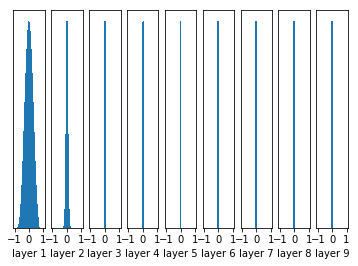

In [18]:
# Random Initialization:
# In the figure below, we can see the output gets lower and lower,
# which means the gradient gets lower and lower.
# It's difficult for us to update weights.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

graph = tf.Graph()
with graph.as_default():
    data = tf.constant(np.random.randn(2000, 800).astype('float32'))
    layer_sizes = [800 - 50 * i for i in range(0,10)]
    num_layers = len(layer_sizes)
    
    fcs = [] # store the output of each layer
    for i in range(0, num_layers - 1):
        X = data if i == 0 else fcs[i - 1]
        node_input = layer_sizes[i]
        node_output = layer_sizes[i + 1]
        W = tf.Variable(np.random.randn(node_input, node_output).astype
                ('float32')) * 0.01 # Random Gaussian/Normal Distribution Initialization for weights
        fc = tf.matmul(X, W)
        fc = tf.nn.tanh(fc)
        fcs.append(fc)
        
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                                      np.std(data.eval())))
    
    for idx, fc in enumerate(fcs):
        print('layer {0}: mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                                              np.std(fc.eval())))
        
    plt.figure()
    for idx, fc in enumerate(fcs):
        plt.subplot(1, len(fcs), idx+1)
        plt.hist(fc.eval().flatten(), 30, range=[-1,1])
        plt.xlabel('layer ' + str(idx + 1))
        plt.yticks([])
        
    plt.show()

input mean 0.00074 and std 1.00061
layer 1: mean 0.00043 and std 0.98575
layer 2: mean -0.00012 and std 0.98512
layer 3: mean 0.00125 and std 0.98461
layer 4: mean -0.00129 and std 0.98394
layer 5: mean 0.00077 and std 0.98328
layer 6: mean 0.00038 and std 0.98262
layer 7: mean -0.00003 and std 0.98167
layer 8: mean -0.00104 and std 0.98061
layer 9: mean -0.00115 and std 0.97959


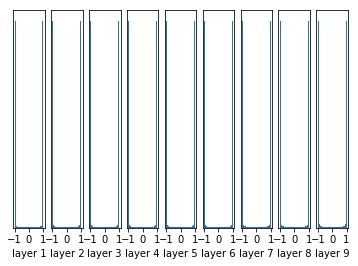

In [19]:
# Random Initialization: Increase initialized weights
# The result is in the figure below,
# almost outputs are stay in -1 or 1,
# and their gradients are close to 0.
# It's also difficult for us to update weights.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

graph = tf.Graph()
with graph.as_default():
    data = tf.constant(np.random.randn(2000, 800).astype('float32'))
    layer_sizes = [800 - 50 * i for i in range(0,10)]
    num_layers = len(layer_sizes)
    
    fcs = [] # store the output of each layer
    for i in range(0, num_layers - 1):
        X = data if i == 0 else fcs[i - 1]
        node_input = layer_sizes[i]
        node_output = layer_sizes[i + 1]
        W = tf.Variable(np.random.randn(node_input, node_output).astype
                ('float32')) # Random Gaussian/Normal Distribution Initialization for weights
        fc = tf.matmul(X, W)
        fc = tf.nn.tanh(fc)
        fcs.append(fc)
        
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                                      np.std(data.eval())))
    
    for idx, fc in enumerate(fcs):
        print('layer {0}: mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                                              np.std(fc.eval())))
        
    plt.figure()
    for idx, fc in enumerate(fcs):
        plt.subplot(1, len(fcs), idx+1)
        plt.hist(fc.eval().flatten(), 30, range=[-1,1])
        plt.xlabel('layer ' + str(idx + 1))
        plt.yticks([])
        
    plt.show()

input mean 0.00028 and std 1.00102
layer 1: mean -0.00015 and std 0.62808
layer 2: mean 0.00053 and std 0.48619
layer 3: mean 0.00015 and std 0.40780
layer 4: mean 0.00007 and std 0.35766
layer 5: mean 0.00062 and std 0.32055
layer 6: mean -0.00035 and std 0.29434
layer 7: mean 0.00065 and std 0.27109
layer 8: mean 0.00026 and std 0.25368
layer 9: mean -0.00018 and std 0.23876


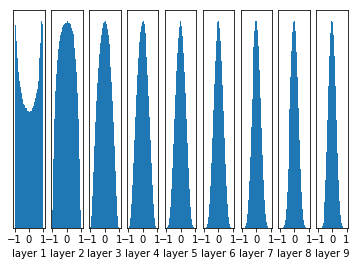

In [28]:
# Xavier Initialization：
# The central idea is to keep the variances of output and input are the same
# in order to avoid that all of outputs are close to 0.
# But the inference of this initialization is based on linear function,
# so it's not suitable for all of non-linear function.
# The result is better(outputs keep appropriate distribution)in the figure because of 'tahn' function,
# it just indicates that it's suitable for 'tanh' but not for all of non-linear function.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

graph = tf.Graph()
with graph.as_default():
    data = tf.constant(np.random.randn(2000, 800).astype('float32'))
    layer_sizes = [800 - 50 * i for i in range(0,10)]
    num_layers = len(layer_sizes)
    
    fcs = [] # store the output of each layer
    for i in range(0, num_layers - 1):
        X = data if i == 0 else fcs[i - 1]
        node_input = layer_sizes[i]
        node_output = layer_sizes[i + 1]
        W = (tf.Variable(np.random.randn(node_input, node_output).astype('float32')) 
             / np.sqrt(node_input)) # Xavier Initalization
        fc = tf.matmul(X, W)
        fc = tf.nn.tanh(fc)
        fcs.append(fc)
        
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                                      np.std(data.eval())))
    
    for idx, fc in enumerate(fcs):
        print('layer {0}: mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                                              np.std(fc.eval())))
        
    plt.figure()
    for idx, fc in enumerate(fcs):
        plt.subplot(1, len(fcs), idx+1)
        plt.hist(fc.eval().flatten(), 30, range=[-1,1])
        plt.xlabel('layer ' + str(idx + 1))
        plt.yticks([])
        
    plt.show()

input mean -0.00012 and std 1.00120
layer 1: mean 0.39984 and std 0.58485
layer 2: mean 0.28709 and std 0.41486
layer 3: mean 0.19198 and std 0.29232
layer 4: mean 0.13950 and std 0.20493
layer 5: mean 0.09120 and std 0.14017
layer 6: mean 0.05732 and std 0.09071
layer 7: mean 0.03722 and std 0.05802
layer 8: mean 0.02462 and std 0.03745
layer 9: mean 0.01892 and std 0.02660


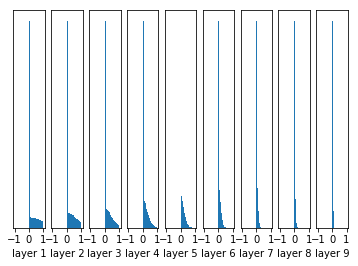

In [29]:
# Xavier Initialization:
# change 'tahn' function into 'relu' function(They are both non-linear function).
# The result shown in the figure is not good.
# We can use 'He Initialization' to solve this problem.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

graph = tf.Graph()
with graph.as_default():
    data = tf.constant(np.random.randn(2000, 800).astype('float32'))
    layer_sizes = [800 - 50 * i for i in range(0,10)]
    num_layers = len(layer_sizes)
    
    fcs = [] # store the output of each layer
    for i in range(0, num_layers - 1):
        X = data if i == 0 else fcs[i - 1]
        node_input = layer_sizes[i]
        node_output = layer_sizes[i + 1]
        W = (tf.Variable(np.random.randn(node_input, node_output).astype('float32')) 
             / np.sqrt(node_input)) # Xavier Initalization
        fc = tf.matmul(X, W)
        fc = tf.nn.relu(fc)
        fcs.append(fc)
        
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                                      np.std(data.eval())))
    
    for idx, fc in enumerate(fcs):
        print('layer {0}: mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                                              np.std(fc.eval())))
        
    plt.figure()
    for idx, fc in enumerate(fcs):
        plt.subplot(1, len(fcs), idx+1)
        plt.hist(fc.eval().flatten(), 30, range=[-1,1])
        plt.xlabel('layer ' + str(idx + 1))
        plt.yticks([])
        
    plt.show()

In [ ]:
'''
   Reference and Notes:
   
   glorot_normal: Glorot正态分布初始化方法，也称作Xavier正态分布初始化。
   glorot_uniform: Glorot均匀分布初始化方法，又成Xavier均匀初始化。
   
   Xavier initialization是由Xavier Glorot et al.在2010年提出，
   He initialization是由Kaiming He et al.在2015年提出，
   Batch Normalization是由Sergey Ioffe et al.在2015年提出。
   
   1. https://keras-cn.readthedocs.io/en/latest/other/initializations/
   2. https://zhuanlan.zhihu.com/p/25110150
   3. Xavier Glorot et al., Understanding the Difficult of Training Deep Feedforward Neural Networks
   4. Kaiming He et al., Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classfication
   5. Sergey Ioffe et al., Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
   6. Standord CS231n
'''
